---

# The $k$-Nearest Neighbors Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
<p align="center">
    <img src="KNN.png" width="400">
</p>

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

---

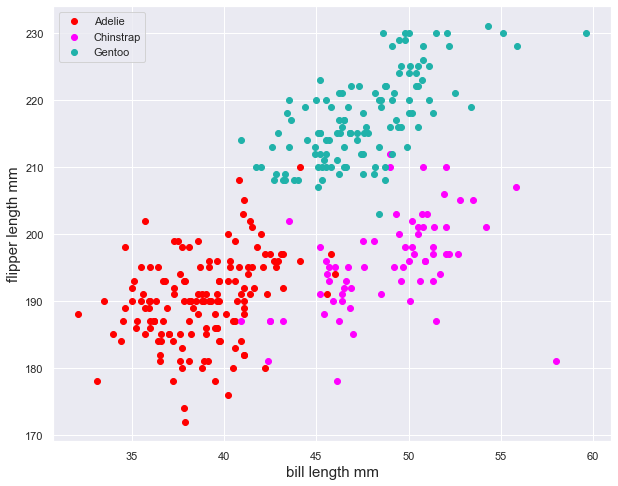

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

# Plot the data
penguins = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length mm", fontsize = 15)
ax.set_ylabel("flipper length mm", fontsize = 15)
ax.legend()
plt.show()

---

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

### The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
 - 3.1 Calculate the distance between the query example and the current example from the data.
 - 3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels


Before implementing this algorithm we creat a training set and testing set by running the following code.

---

In [2]:
from sklearn.model_selection import train_test_split

X = df[["bill_length_mm",
          "flipper_length_mm"]].to_numpy()

y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

---

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


---

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 15.120846537148637


---

With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below. 

---

In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([ 52., 197.]), 'Chinstrap', 0.7000000000000028],
 [array([ 52.2, 197. ]), 'Chinstrap', 0.9000000000000057],
 [array([ 51.3, 198. ]), 'Chinstrap', 1.0],
 [array([ 50.3, 197. ]), 'Chinstrap', 1.0],
 [array([ 50.9, 196. ]), 'Chinstrap', 1.0770329614269003]]

In [6]:
y_test[-1]

'Chinstrap'

---

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below. 

---

In [7]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

---

Next we write a function to compute the classification error



---

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/len(test_features)

In [10]:
classification_error(X_test, y_test, X_train, y_train, 7)

0.00909090909090909

### Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.


In [11]:
possible_k = [x for x in range(3, 26, 2)] #skipping even numbers
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

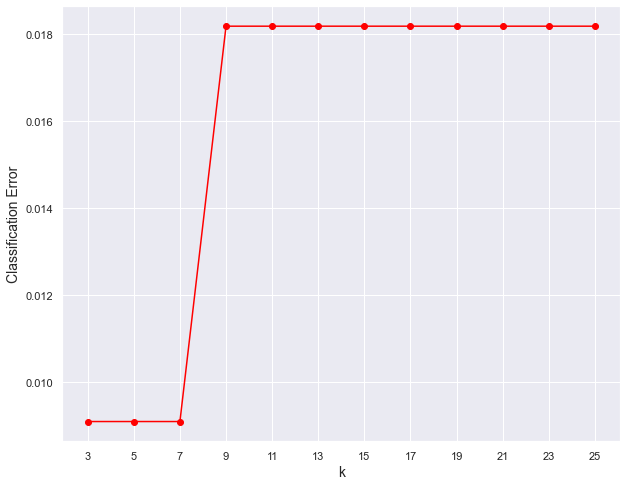

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = 'o')
#plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)

plt.show()

The graph above shows how the classification error increases after k value of 7. K-value indicates the count of the nearest neighbors. The optimal K value usually found is the square root of N, where N is the total number of samples. So in total there are 344 samples, sqaure root of 344 is 18.5, but since the data set is fairly small, it makes sense that suitable K-value is less than 10.

Next, I want to try Scikit-learn packages.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Grab Adelie and Chinstrap
df = df[df["species"] != "Gentoo"]

# Create feature matrix
X = df[["bill_length_mm","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [15]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0] 

y_pred == y_test = [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.9295774647887324


In [16]:
# Calculate the accuracy
clf.score(X_test, y_test)

0.9295774647887324

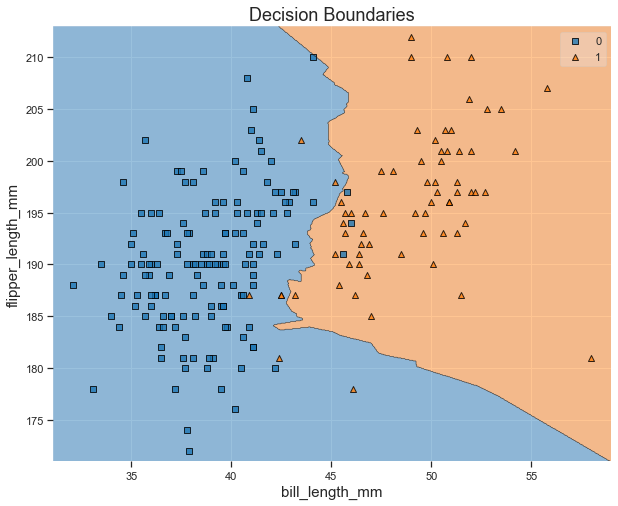

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

Let's see if we change the K-value.

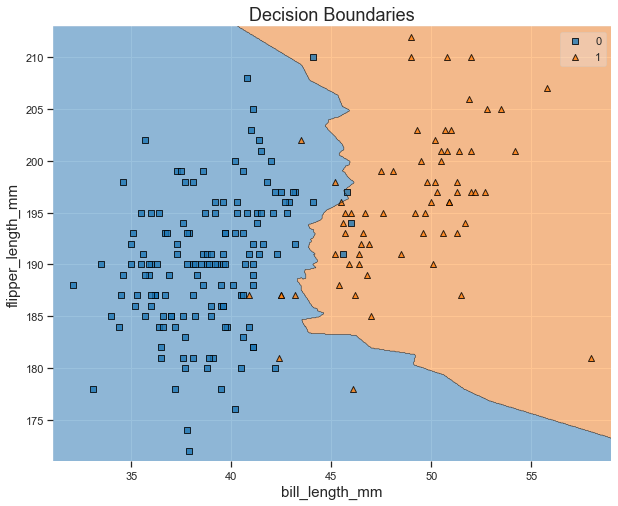

In [18]:
clf = KNeighborsClassifier(n_neighbors = 9)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

In [19]:
clf.score(X_test, y_test)

0.9295774647887324

Not much difference observed. Let's try two extremes. K=3 and K=18

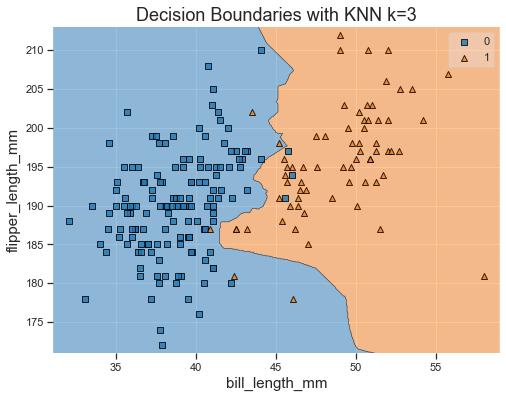

In [21]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Decision Boundaries with KNN k=3", fontsize = 18)
plt.show()

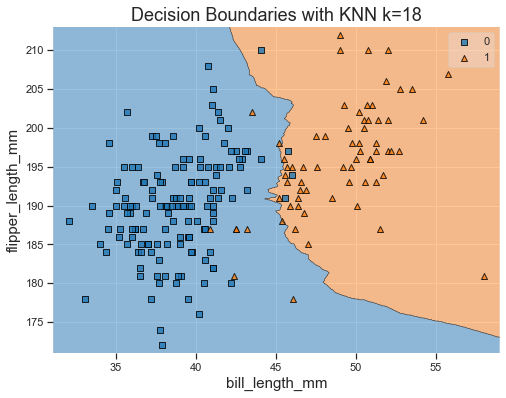

In [22]:
clf = KNeighborsClassifier(n_neighbors = 18)
clf.fit(X_train, y_train)

plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("Decision Boundaries with KNN k=18", fontsize = 18)
plt.show()

My observation is that different extremes favor different species in this case. So for the smaller k the the Adelie(orange) species were classified cleareer, because the data for Adelie is less spread. Reversely the larger k classified the Chinstrap(blue) better because it is more spread.

Next, I would explore the confusion matrix.


cf_matrix = [[47  2]
 [ 3 19]]
 


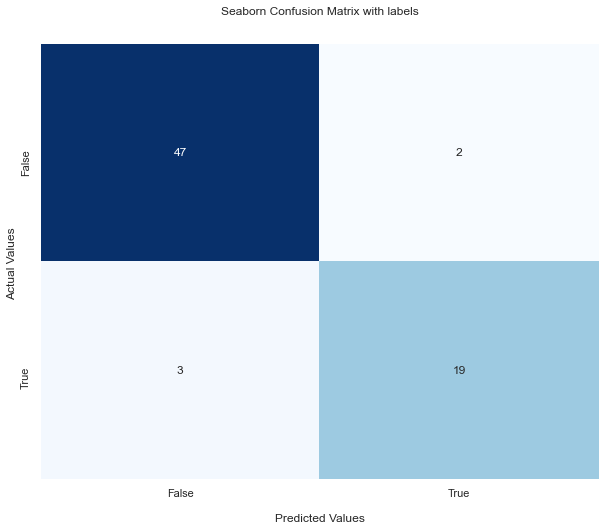

In [23]:
from sklearn.metrics import confusion_matrix

#Fit the model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train,y_train)#Generate predictions with the model using our X values
y_pred = clf.predict(X_test)#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix}\n ")


plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The confusion matrix looks great. The diagonal is bright blue, meaning that the predicted and actual values matched.
I would try KNN with different Penguin Species.


In [29]:
# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

# Grab Gentoo and Chinstrap this time
df = df[df["species"] != "Adelie"]

# Create feature matrix
X = df[["bill_length_mm","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 4)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train,y_train)#Generate predictions with the model using our X values
y_pred = clf.predict(X_test)#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix}\n ")




cf_matrix = [[18  1]
 [ 0 43]]
 


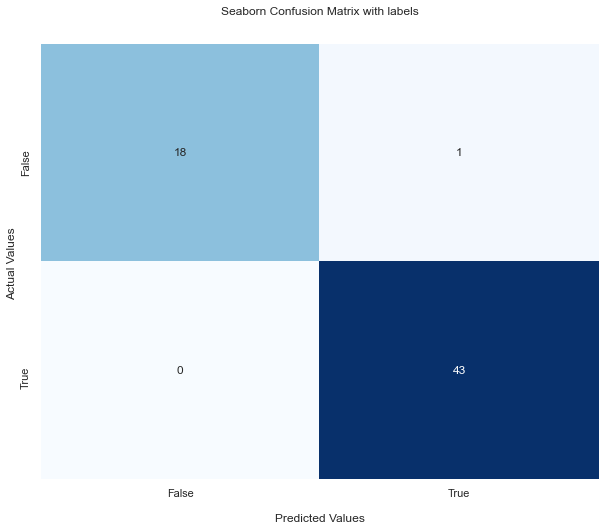

In [30]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Great result for these species as well. Now let's try different features.

In [31]:
# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

# Grab Gentoo and Chinstrap this time
df = df[df["species"] != "Adelie"]

# Create feature matrix
X = df[["body_mass_g","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 4)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train,y_train)#Generate predictions with the model using our X values
y_pred = clf.predict(X_test)#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(f"cf_matrix = {cf_matrix}\n ")


cf_matrix = [[15  4]
 [ 4 39]]
 


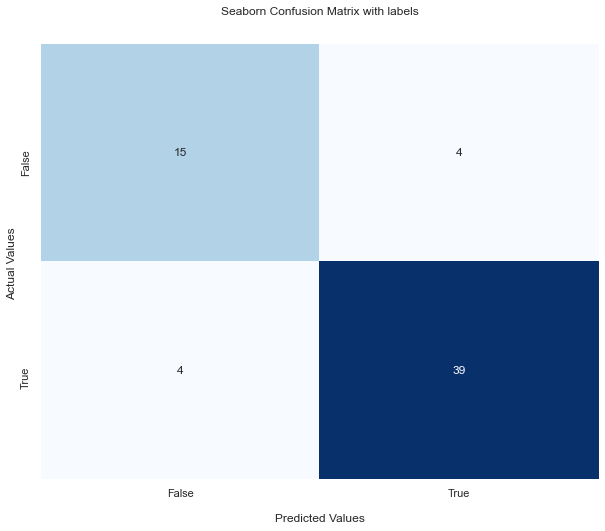

In [32]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Great classification results.

In [33]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.91      0.91      0.91        43

    accuracy                           0.87        62
   macro avg       0.85      0.85      0.85        62
weighted avg       0.87      0.87      0.87        62



In statistical analysis of binary classification, the *F-score* or F-measure is a measure of a test's accuracy. It is calculated from the *precision* and *recall* of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. Precision is also known as positive predictive value, and recall is also known as sensitivity in diagnostic binary classification.

The F1 score is the harmonic mean of the precision and recall. The more generic {\displaystyle F_{\beta }}F_{\beta } score applies additional weights, valuing one of precision or recall more than the other.

The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. 